In [248]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import warnings
warnings.filterwarnings("ignore")
from mlxtend.frequent_patterns import apriori, association_rules

In [249]:
NBA = pd.read_csv('games_details.csv', low_memory=False)
NBA

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22101005,1610612750,MIN,Minnesota,1630162,Anthony Edwards,Anthony,F,NaN,36:22,...,0.0,8.0,8.0,5.0,3.0,1.0,1.0,1.0,15.0,5.0
1,22101005,1610612750,MIN,Minnesota,1630183,Jaden McDaniels,Jaden,F,NaN,23:54,...,2.0,4.0,6.0,0.0,0.0,2.0,2.0,6.0,14.0,10.0
2,22101005,1610612750,MIN,Minnesota,1626157,Karl-Anthony Towns,Karl-Anthony,C,NaN,25:17,...,1.0,9.0,10.0,0.0,0.0,0.0,3.0,4.0,15.0,14.0
3,22101005,1610612750,MIN,Minnesota,1627736,Malik Beasley,Malik,G,NaN,30:52,...,0.0,3.0,3.0,1.0,1.0,0.0,1.0,4.0,12.0,20.0
4,22101005,1610612750,MIN,Minnesota,1626156,D'Angelo Russell,D'Angelo,G,NaN,33:46,...,0.0,6.0,6.0,9.0,1.0,0.0,5.0,0.0,14.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645948,11200005,1610612743,DEN,Denver,202706,Jordan Hamilton,NaN,NaN,NaN,19,...,0.0,2.0,2.0,0.0,2.0,0.0,1.0,3.0,17.0,NaN
645949,11200005,1610612743,DEN,Denver,202702,Kenneth Faried,NaN,NaN,NaN,23,...,1.0,0.0,1.0,1.0,1.0,0.0,3.0,3.0,18.0,NaN
645950,11200005,1610612743,DEN,Denver,201585,Kosta Koufos,NaN,NaN,NaN,15,...,3.0,5.0,8.0,0.0,1.0,0.0,0.0,3.0,6.0,NaN
645951,11200005,1610612743,DEN,Denver,202389,Timofey Mozgov,NaN,NaN,NaN,19,...,1.0,2.0,3.0,1.0,0.0,0.0,4.0,2.0,2.0,NaN


In [250]:
WinLoss = pd.read_csv('ranking.csv')
WinLoss

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
0,1610612756,0,22021,2022-03-12,West,Phoenix,67,53,14,0.791,28-8,25-6,NaN
1,1610612744,0,22021,2022-03-12,West,Golden State,68,46,22,0.676,28-7,18-15,NaN
2,1610612763,0,22021,2022-03-12,West,Memphis,68,46,22,0.676,24-10,22-12,NaN
3,1610612762,0,22021,2022-03-12,West,Utah,67,42,25,0.627,24-10,18-15,NaN
4,1610612742,0,22021,2022-03-12,West,Dallas,67,41,26,0.612,23-12,18-14,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
201787,1610612765,0,22013,2014-09-01,East,Detroit,82,29,53,0.354,17-24,12-29,NaN
201788,1610612738,0,22013,2014-09-01,East,Boston,82,25,57,0.305,16-25,9-32,NaN
201789,1610612753,0,22013,2014-09-01,East,Orlando,82,23,59,0.280,19-22,4-37,NaN
201790,1610612755,0,22013,2014-09-01,East,Philadelphia,82,19,63,0.232,10-31,9-32,NaN


In [251]:
team_record = WinLoss.groupby(['SEASON_ID', 'TEAM'])

win_record = team_record['W'].max()
win_record = win_record.loc[12005 : 22021]
win_record = win_record.unstack()
win_record = win_record.sum()
win_record = win_record.astype(int)

win_record['Los Angeles'] = win_record['L.A. Lakers']
win_record['LA'] = win_record['L.A. Clippers'] + win_record['LA Clippers']

win_record

TEAM
Atlanta                       786
Boston                        953
Brooklyn                      387
Charlotte                     616
Chicago                       853
Cleveland                     817
Dallas                        999
Denver                        933
Detroit                       821
Golden State                  927
Houston                       968
Indiana                       891
L.A. Clippers                 530
L.A. Lakers                   887
LA Clippers                   341
Memphis                       849
Miami                         939
Milwaukee                     808
Minnesota                     691
New Jersey                    372
New Orleans                   702
New Orleans/Oklahoma City      77
New York                      684
Oklahoma City                 662
Orlando                       770
Philadelphia                  773
Phoenix                       872
Portland                      870
Sacramento                    720
San Anton

In [252]:
loss_record = team_record['L'].max()
loss_record = loss_record.loc[12005 : 22021]
loss_record = loss_record.unstack()
loss_record = loss_record.sum()
loss_record = loss_record.astype(int)

loss_record['Los Angeles'] = loss_record['L.A. Lakers']
loss_record['LA'] = loss_record['L.A. Clippers'] + loss_record['LA Clippers']

loss_record

TEAM
Atlanta                      903
Boston                       742
Brooklyn                     448
Charlotte                    914
Chicago                      840
Cleveland                    870
Dallas                       702
Denver                       766
Detroit                      872
Golden State                 759
Houston                      727
Indiana                      800
L.A. Clippers                592
L.A. Lakers                  816
LA Clippers                  234
Memphis                      853
Miami                        763
Milwaukee                    887
Minnesota                    996
New Jersey                   477
New Orleans                  825
New Orleans/Oklahoma City     87
New York                     995
Oklahoma City                510
Orlando                      930
Philadelphia                 916
Phoenix                      821
Portland                     825
Sacramento                   976
San Antonio                  585
Seatt

In [253]:
clean_league = NBA.drop(
    [
        'GAME_ID',
        'TEAM_ID',
        'PLAYER_ID',
        'PLUS_MINUS',
        'PTS'
    ],
    axis = 1
)

clean_league.insert(loc = 7, column = 'PTS', value = NBA['PTS'])
clean_league.insert(loc = 8, column = 'PLUS_MINUS', value = NBA['PLUS_MINUS'])
#clean_league = clean_league.fillna(0)

clean_league

,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,PTS,PLUS_MINUS,FGM,...,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF
0,MIN,Minnesota,Anthony Edwards,Anthony,F,NaN,36:22,15.0,5.0,4.0,...,4.0,1.000,0.0,8.0,8.0,5.0,3.0,1.0,1.0,1.0
1,MIN,Minnesota,Jaden McDaniels,Jaden,F,NaN,23:54,14.0,10.0,6.0,...,1.0,1.000,2.0,4.0,6.0,0.0,0.0,2.0,2.0,6.0
2,MIN,Minnesota,Karl-Anthony Towns,Karl-Anthony,C,NaN,25:17,15.0,14.0,4.0,...,8.0,0.750,1.0,9.0,10.0,0.0,0.0,0.0,3.0,4.0
3,MIN,Minnesota,Malik Beasley,Malik,G,NaN,30:52,12.0,20.0,4.0,...,0.0,0.000,0.0,3.0,3.0,1.0,1.0,0.0,1.0,4.0
4,MIN,Minnesota,D'Angelo Russell,D'Angelo,G,NaN,33:46,14.0,17.0,3.0,...,7.0,1.000,0.0,6.0,6.0,9.0,1.0,0.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645948,DEN,Denver,Jordan Hamilton,NaN,NaN,NaN,19,17.0,NaN,4.0,...,7.0,0.857,0.0,2.0,2.0,0.0,2.0,0.0,1.0,3.0
645949,DEN,Denver,Kenneth Faried,NaN,NaN,NaN,23,18.0,NaN,7.0,...,4.0,1.000,1.0,0.0,1.0,1.0,1.0,0.0,3.0,3.0
645950,DEN,Denver,Kosta Koufos,NaN,NaN,NaN,15,6.0,NaN,3.0,...,0.0,0.000,3.0,5.0,8.0,0.0,1.0,0.0,0.0,3.0
645951,DEN,Denver,Timofey Mozgov,NaN,NaN,NaN,19,2.0,NaN,1.0,...,2.0,0.000,1.0,2.0,3.0,1.0,0.0,0.0,4.0,2.0


In [254]:
teams = clean_league.groupby(['TEAM_CITY'])
teams = teams.sum()

opponent_points = teams['PTS'] - teams['PLUS_MINUS']
teams.insert(loc = 1, column = 'OPP_PTS', value = opponent_points)

teams.insert(loc = 0, column = 'WINS', value = win_record)
teams.insert(loc = 1, column = 'LOSSES', value = loss_record)

total_games = win_record + loss_record
teams.insert(loc = 2, column = 'WIN_PCT', value = win_record / total_games)

teams = teams.sort_values(by = ['WIN_PCT'], ascending = False)
teams

,WINS,LOSSES,WIN_PCT,PTS,OPP_PTS,PLUS_MINUS,FGM,FGA,FG_PCT,FG3M,...,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF
TEAM_CITY,,,,,,,,,,,,,,,,,,,,,
San Antonio,1104,585,0.653641,185112.0,143043.0,42069.0,69779.0,149301.0,8715.635,14469.0,...,40889.0,8226.724,18069.0,59707.0,77776.0,41503.0,13167.0,9354.0,23529.0,34844.0
Dallas,999,702,0.587302,179862.0,162305.0,17557.0,66387.0,145523.0,7954.002,15221.0,...,40697.0,8330.019,18298.0,56366.0,74664.0,38217.0,12819.0,8267.0,22278.0,35961.0
Houston,968,727,0.571091,180016.0,164319.0,15697.0,64645.0,143966.0,7285.753,17892.0,...,43550.0,7518.013,18716.0,56349.0,75065.0,37452.0,13647.0,8145.0,24969.0,36687.0
Oklahoma City,662,510,0.564846,134673.0,124437.0,10236.0,49388.0,108423.0,5727.976,10672.0,...,32476.0,5581.595,14565.0,43112.0,57677.0,26886.0,10135.0,7265.0,18536.0,27040.0
Boston,953,742,0.562242,182816.0,163669.0,19147.0,67529.0,147678.0,8078.226,14824.0,...,42663.0,8481.491,17971.0,57778.0,75749.0,40930.0,14461.0,8567.0,25605.0,39671.0
Miami,939,763,0.551704,182296.0,165221.0,17075.0,67449.0,145593.0,7787.307,14817.0,...,44051.0,7748.052,17613.0,58117.0,75730.0,38798.0,13708.0,9153.0,24880.0,38017.0
Utah,933,763,0.550118,173165.0,160202.0,12963.0,63776.0,138229.0,7768.609,12806.0,...,43650.0,8199.440,19277.0,53988.0,73265.0,38495.0,12964.0,8739.0,24609.0,37957.0
Golden State,927,759,0.549822,186796.0,167619.0,19177.0,69410.0,149486.0,8012.467,17144.0,...,40403.0,7964.949,18464.0,56896.0,75360.0,42891.0,14572.0,9381.0,25180.0,37980.0
Denver,933,766,0.549147,183097.0,169667.0,13430.0,67501.0,145977.0,7668.608,13823.0,...,45516.0,8250.727,19764.0,55859.0,75623.0,41028.0,14052.0,8815.0,24847.0,37200.0


<AxesSubplot:xlabel='TEAM_CITY'>

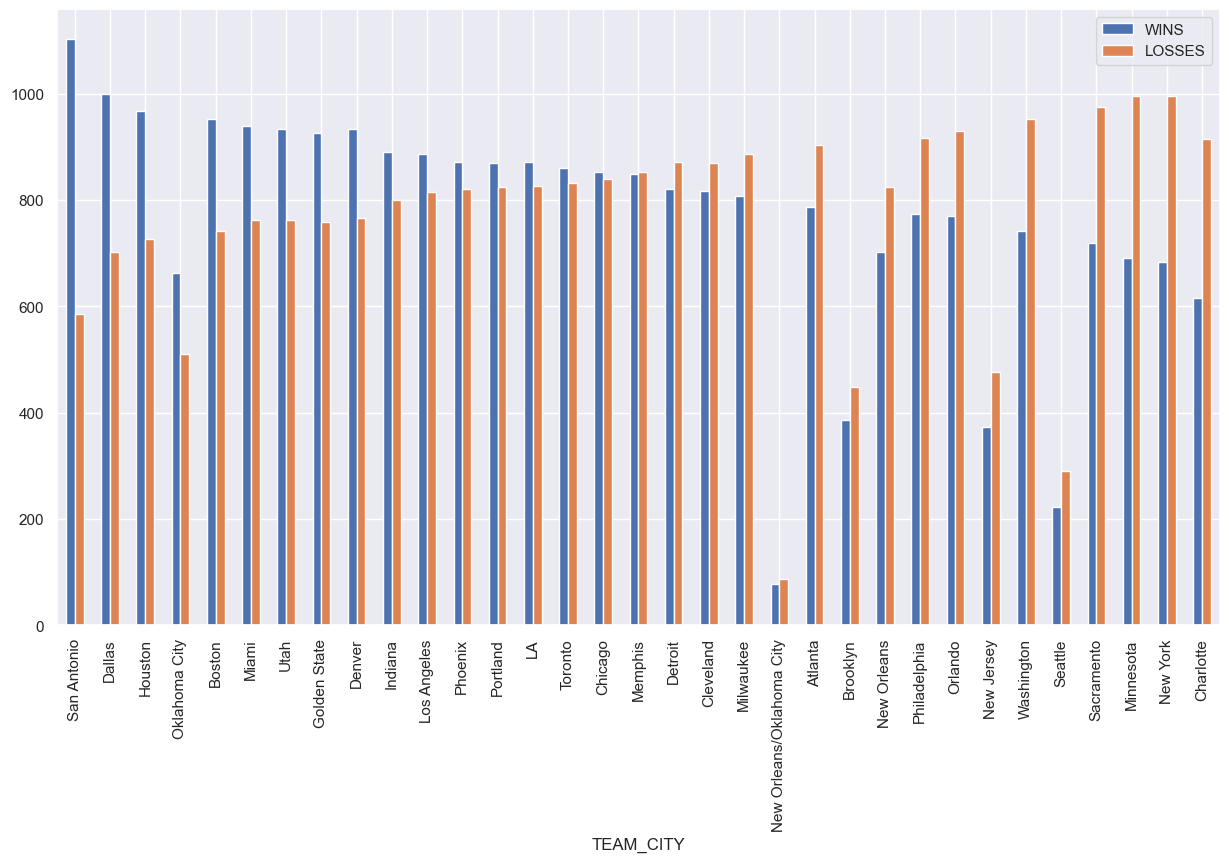

In [255]:
teams[['WINS', 'LOSSES']].plot(kind='bar', figsize=(15, 8))

<AxesSubplot:xlabel='TEAM_CITY'>

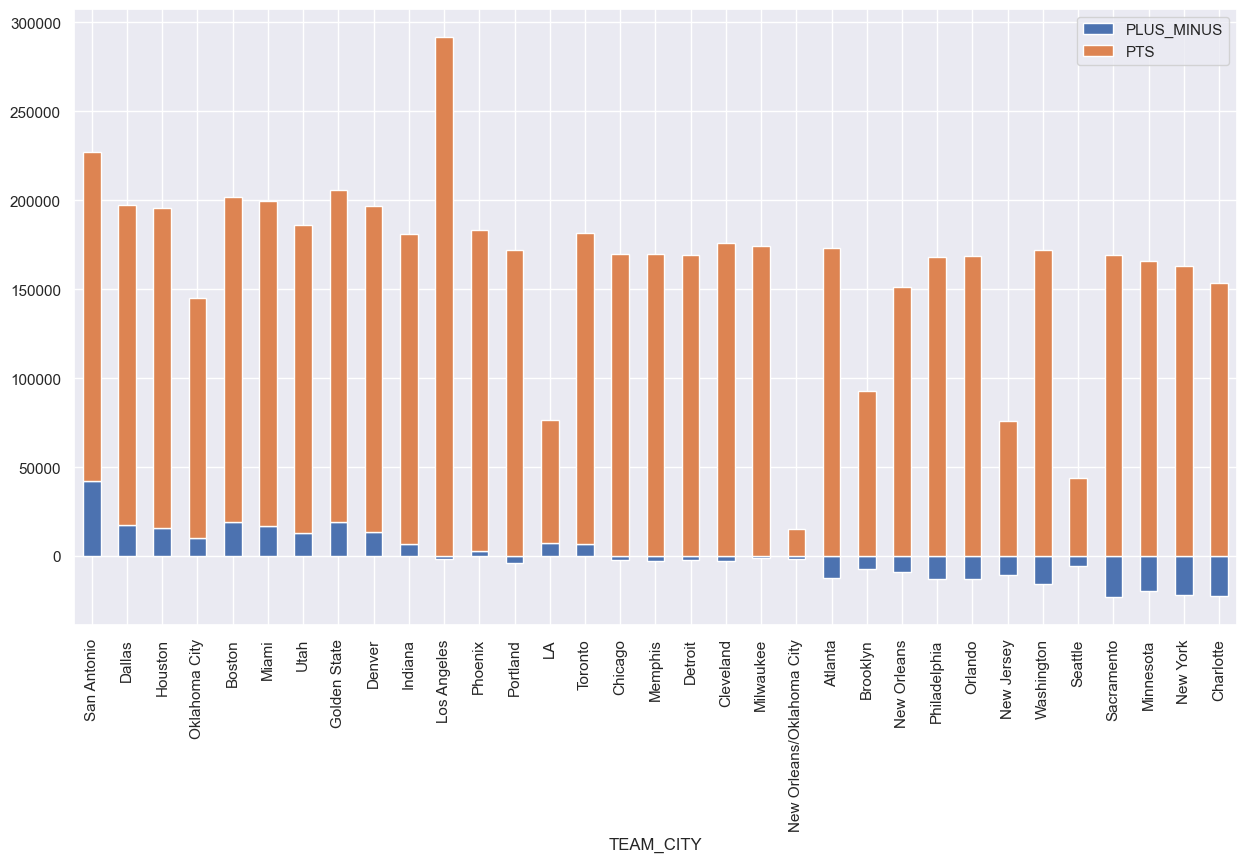

In [256]:
teams[['PLUS_MINUS', 'PTS']].plot(kind='bar', stacked=True, figsize=(15, 8))

<AxesSubplot:xlabel='TEAM_CITY'>

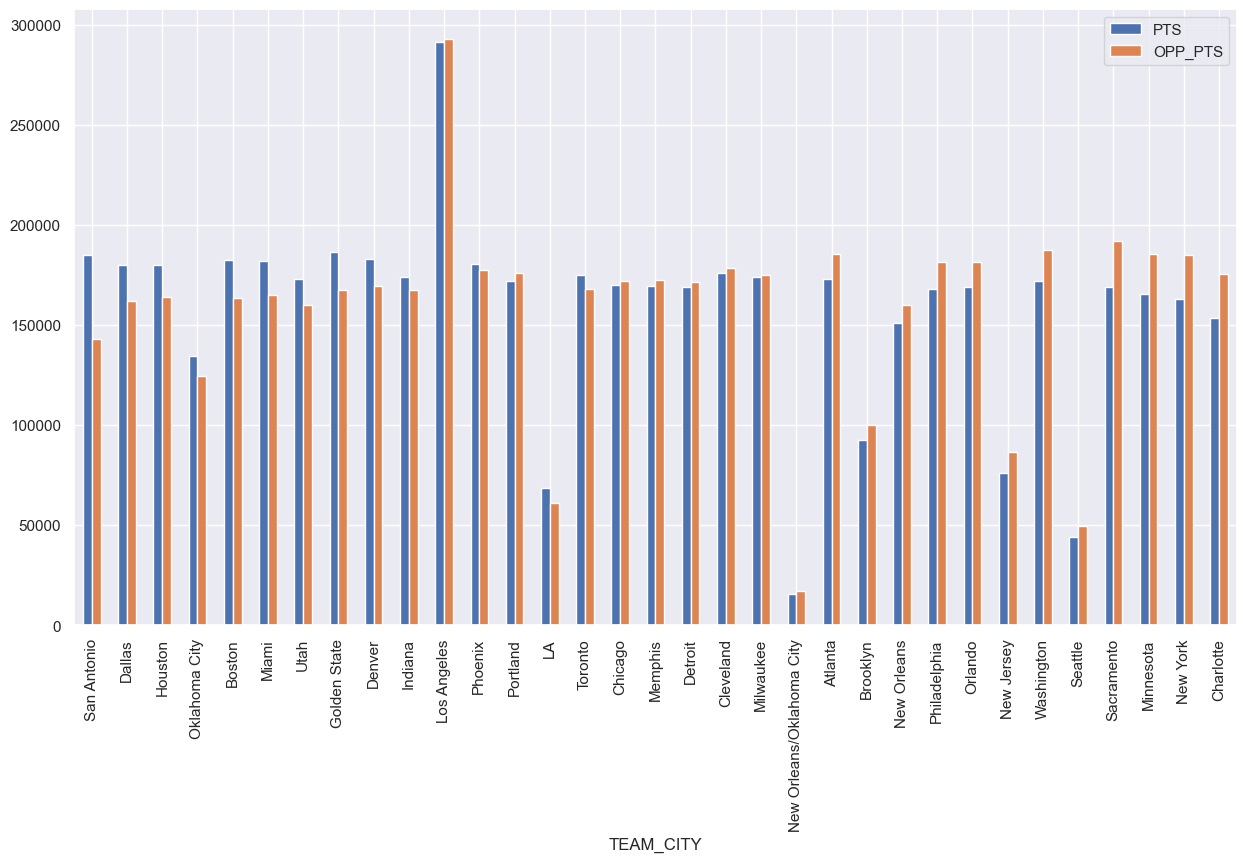

In [257]:
teams[['PTS', 'OPP_PTS']].plot(kind='bar', figsize=(15, 8))

In [258]:
players = clean_league.groupby(['PLAYER_NAME'])
games_played = players['MIN'].count()

players = players.sum()
players.insert(loc = 0, column = 'GAMES_PLAYED', value = games_played)

PointsPerGame = players['PTS'] / players['GAMES_PLAYED']
AvgPlusMin = players['PLUS_MINUS'] / players['GAMES_PLAYED']

players.insert(loc = 2, column = 'AVG_PLUS_MIN', value = PointsPerGame)
players.insert(loc = 4, column = 'PPG', value = PointsPerGame)

players

,GAMES_PLAYED,PTS,AVG_PLUS_MIN,PLUS_MINUS,PPG,FGM,FGA,FG_PCT,FG3M,FG3A,...,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF
PLAYER_NAME,,,,,,,,,,,,,,,,,,,,,
A.J. Guyton,1,4.0,4.000000,0.0,4.000000,0.0,4.0,0.000,0.0,2.0,...,4.0,1.000,1.0,1.0,2.0,1.0,1.0,0.0,0.0,2.0
A.J. Lawson,1,8.0,8.000000,-6.0,8.000000,2.0,3.0,0.667,2.0,2.0,...,2.0,1.000,0.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0
AJ Hammons,29,82.0,2.827586,2.0,2.827586,34.0,76.0,8.924,5.0,12.0,...,20.0,3.750,14.0,46.0,60.0,7.0,1.0,16.0,14.0,34.0
AJ Price,301,1832.0,6.086379,-55.0,6.086379,655.0,1686.0,103.594,267.0,805.0,...,343.0,96.154,83.0,352.0,435.0,647.0,143.0,9.0,279.0,289.0
Aamir Simms,2,4.0,2.000000,6.0,2.000000,1.0,2.0,1.000,0.0,0.0,...,2.0,1.000,3.0,2.0,5.0,2.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zion Williamson,92,2357.0,25.619565,175.0,25.619565,908.0,1494.0,57.090,17.0,55.0,...,767.0,62.348,245.0,394.0,639.0,289.0,81.0,49.0,242.0,192.0
Zoran Dragic,17,28.0,1.647059,-15.0,1.647059,11.0,33.0,1.362,3.0,15.0,...,5.0,2.000,5.0,4.0,9.0,5.0,2.0,0.0,5.0,6.0
Zoran Planinic,169,651.0,3.852071,-199.0,3.852071,225.0,553.0,53.642,40.0,144.0,...,240.0,47.778,53.0,170.0,223.0,189.0,68.0,7.0,137.0,264.0


In [259]:
PlusMinSum = players.sort_values(by = ['PLUS_MINUS'], ascending = False)
top20Sum = PlusMinSum.iloc[:20]
top20Sum

,GAMES_PLAYED,PTS,AVG_PLUS_MIN,PLUS_MINUS,PPG,FGM,FGA,FG_PCT,FG3M,FG3A,...,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF
PLAYER_NAME,,,,,,,,,,,,,,,,,,,,,
LeBron James,1703,45683.0,26.825015,8512.0,26.825015,16612.0,33053.0,857.181,2599.0,7552.0,...,13414.0,1221.083,2035.0,10831.0,12866.0,12263.0,2693.0,1322.0,5930.0,3214.0
Tim Duncan,1170,20177.0,17.245299,6509.0,17.245299,7908.0,15722.0,589.629,18.0,105.0,...,6326.0,756.594,2983.0,8817.0,11800.0,3355.0,808.0,2286.0,2433.0,2563.0
Stephen Curry,1008,24334.0,24.140873,6432.0,24.140873,8290.0,17625.0,469.650,3776.0,8917.0,...,4391.0,793.049,680.0,4010.0,4690.0,6434.0,1671.0,241.0,3185.0,2428.0
Manu Ginobili,1235,16803.0,13.605668,6104.0,13.605668,5440.0,12243.0,533.788,1798.0,4907.0,...,4982.0,848.319,788.0,3682.0,4470.0,4786.0,1595.0,370.0,2572.0,2655.0
Chris Paul,1363,24529.0,17.996332,5977.0,17.996332,8668.0,18364.0,632.781,1830.0,4956.0,...,6184.0,1043.314,851.0,5262.0,6113.0,12632.0,2848.0,202.0,3311.0,3368.0
Tony Parker,1345,21612.0,16.068401,5558.0,16.068401,8663.0,17639.0,637.715,474.0,1498.0,...,5071.0,816.169,484.0,3190.0,3674.0,7519.0,1094.0,105.0,3162.0,2143.0
Kevin Durant,1139,30706.0,26.958736,5095.0,26.958736,10486.0,21302.0,569.506,2168.0,5692.0,...,8605.0,978.440,806.0,7237.0,8043.0,4708.0,1238.0,1254.0,3525.0,2263.0
Draymond Green,843,7715.0,9.151839,4877.0,9.151839,2792.0,6383.0,347.998,746.0,2367.0,...,1940.0,396.192,992.0,5087.0,6079.0,4573.0,1191.0,912.0,1908.0,2479.0
Dirk Nowitzki,1330,27927.0,20.997744,4833.0,20.997744,9908.0,21014.0,625.729,1552.0,4100.0,...,7376.0,1047.120,1219.0,8715.0,9934.0,3213.0,997.0,1068.0,2175.0,2997.0


<AxesSubplot:xlabel='PLAYER_NAME'>

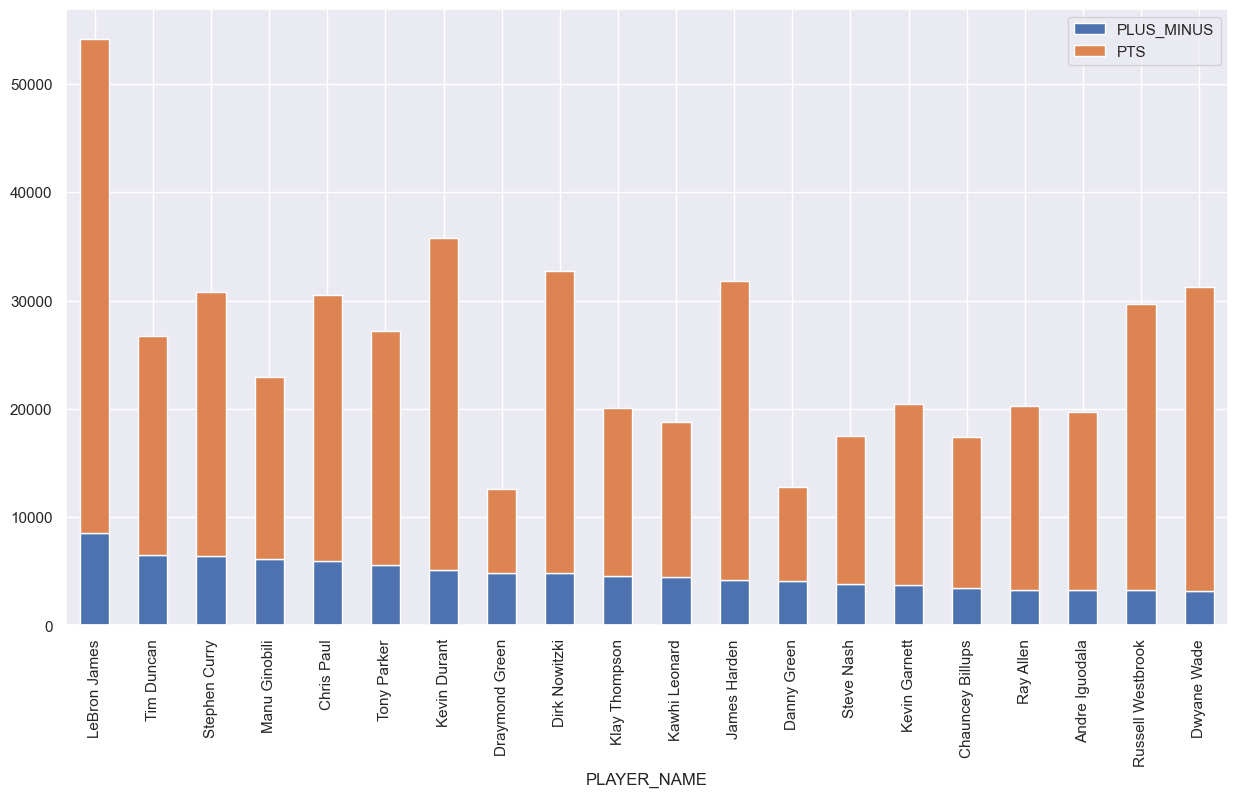

In [260]:
top20Sum[['PLUS_MINUS', 'PTS']].plot(kind='bar',  stacked=True, figsize=(15, 8))

In [261]:
PlusMinAvg = players.sort_values(by = ['AVG_PLUS_MIN'], ascending = False)
top20Avg = PlusMinAvg.iloc[:20]
top20Avg

,GAMES_PLAYED,PTS,AVG_PLUS_MIN,PLUS_MINUS,PPG,FGM,FGA,FG_PCT,FG3M,FG3A,...,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF
PLAYER_NAME,,,,,,,,,,,,,,,,,,,,,
Kevin Durant,1139,30706.0,26.958736,5095.0,26.958736,10486.0,21302.0,569.506,2168.0,5692.0,...,8605.0,978.440,806.0,7237.0,8043.0,4708.0,1238.0,1254.0,3525.0,2263.0
LeBron James,1703,45683.0,26.825015,8512.0,26.825015,16612.0,33053.0,857.181,2599.0,7552.0,...,13414.0,1221.083,2035.0,10831.0,12866.0,12263.0,2693.0,1322.0,5930.0,3214.0
Kobe Bryant,1025,27287.0,26.621463,2330.0,26.621463,9411.0,21210.0,452.471,1636.0,4995.0,...,8134.0,823.277,1047.0,4370.0,5417.0,5041.0,1491.0,392.0,3191.0,2478.0
Luka Doncic,279,7268.0,26.050179,482.0,26.050179,2490.0,5437.0,126.003,758.0,2251.0,...,2104.0,196.699,290.0,2071.0,2361.0,2184.0,294.0,114.0,1134.0,625.0
Allen Iverson,461,11923.0,25.863341,58.0,25.863341,4051.0,9367.0,197.277,456.0,1455.0,...,4197.0,361.478,256.0,1221.0,1477.0,3105.0,881.0,61.0,1619.0,733.0
Zion Williamson,92,2357.0,25.619565,175.0,25.619565,908.0,1494.0,57.090,17.0,55.0,...,767.0,62.348,245.0,394.0,639.0,289.0,81.0,49.0,242.0,192.0
Joel Embiid,366,9138.0,24.967213,2022.0,24.967213,2985.0,6165.0,176.281,413.0,1269.0,...,3401.0,291.477,829.0,3202.0,4031.0,1154.0,304.0,591.0,1226.0,1143.0
Trae Young,299,7380.0,24.682274,-250.0,24.682274,2371.0,5471.0,127.675,752.0,2164.0,...,2172.0,246.707,190.0,950.0,1140.0,2646.0,287.0,47.0,1231.0,533.0
James Harden,1127,27549.0,24.444543,4211.0,24.444543,8134.0,18473.0,493.061,3059.0,8509.0,...,9577.0,926.614,870.0,5343.0,6213.0,7413.0,1766.0,596.0,4175.0,3021.0


<AxesSubplot:xlabel='PLAYER_NAME'>

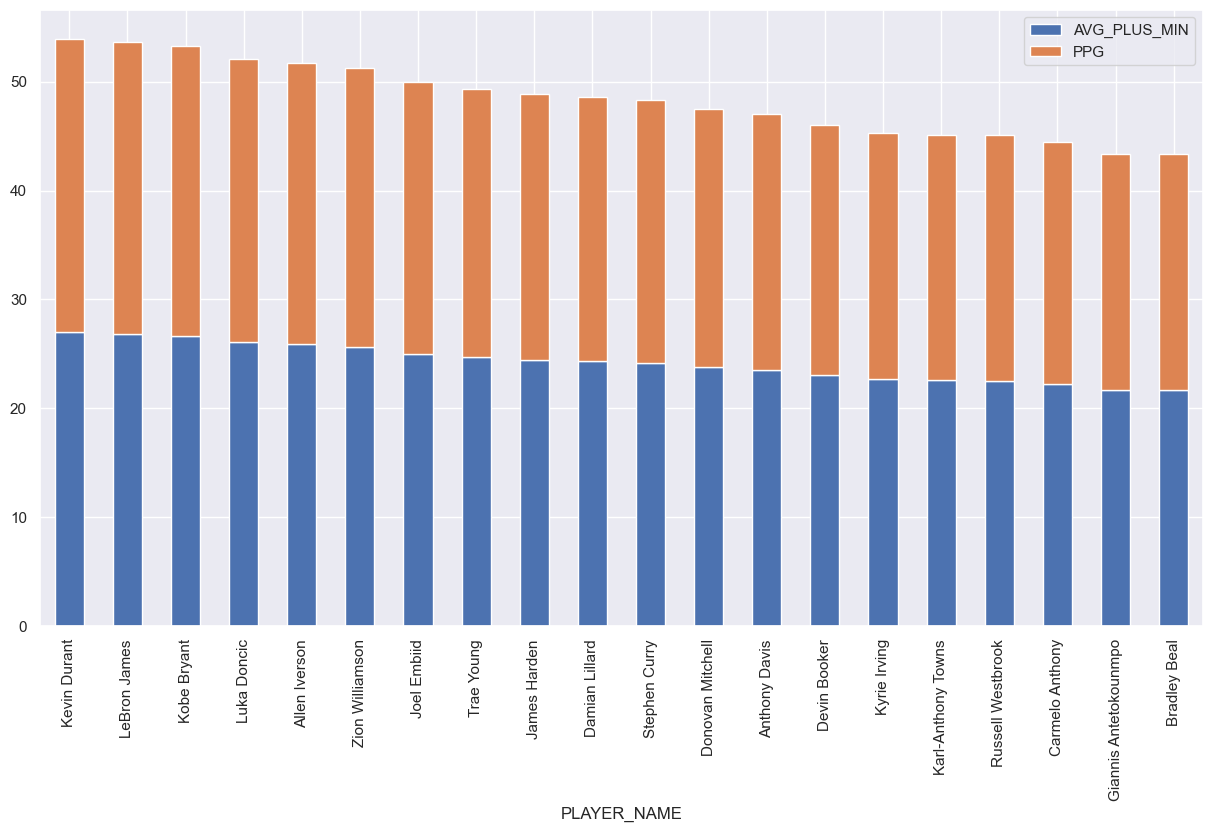

In [262]:
top20Avg[['AVG_PLUS_MIN', 'PPG']].plot(kind='bar',  stacked=True, figsize=(15, 8))

In [263]:
corr_matrix = clean_league.corr()
corr_matrix.sort_values(by = 'PLUS_MINUS', ascending = False)

,PTS,PLUS_MINUS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF
PLUS_MINUS,0.204389,1.000000,0.196867,0.094922,0.191512,0.157843,0.077233,0.137900,0.112862,0.103394,0.098484,0.042987,0.175194,0.152283,0.170968,0.122468,0.089076,-0.016157,0.012890
PTS,1.000000,0.204389,0.960353,0.881684,0.444453,0.554851,0.514154,0.372936,0.668489,0.654966,0.508810,0.243506,0.442952,0.439300,0.430077,0.306815,0.161626,0.415912,0.271850
FGM,0.960353,0.196867,1.000000,0.884617,0.496714,0.478217,0.441318,0.320417,0.470505,0.477921,0.381143,0.272387,0.445859,0.453140,0.401419,0.292207,0.176022,0.392979,0.269415
FG_PCT,0.444453,0.191512,0.496714,0.209148,1.000000,0.208262,0.035220,0.297069,0.137355,0.155894,0.159967,0.149460,0.210866,0.222597,0.091089,0.101102,0.131282,0.125848,0.174778
DREB,0.442952,0.175194,0.445859,0.445862,0.210866,0.092210,0.109980,0.025086,0.322914,0.358980,0.255081,0.394507,1.000000,0.929412,0.214525,0.176729,0.328532,0.293864,0.283766
AST,0.430077,0.170968,0.401419,0.471379,0.091089,0.252139,0.328359,0.182306,0.310344,0.297364,0.250880,0.002095,0.214525,0.166234,1.000000,0.296455,-0.002456,0.388286,0.129855
FG3M,0.554851,0.157843,0.478217,0.457543,0.208262,1.000000,0.821595,0.722485,0.153433,0.122881,0.154254,-0.112408,0.092210,0.025946,0.252139,0.159082,-0.054619,0.163513,0.075584
REB,0.439300,0.152283,0.453140,0.450951,0.222597,0.025946,0.031240,-0.032090,0.325963,0.374418,0.257454,0.705771,0.929412,1.000000,0.166234,0.169740,0.365545,0.282110,0.312106
FG3_PCT,0.372936,0.137900,0.320417,0.248435,0.297069,0.722485,0.457253,1.000000,0.079709,0.054109,0.098014,-0.128059,0.025086,-0.032090,0.182306,0.109315,-0.073288,0.099052,0.034666
STL,0.306815,0.122468,0.292207,0.326812,0.101102,0.159082,0.204688,0.109315,0.217153,0.221681,0.182931,0.083381,0.176729,0.169740,0.296455,1.000000,0.058277,0.230167,0.143878


<AxesSubplot:>

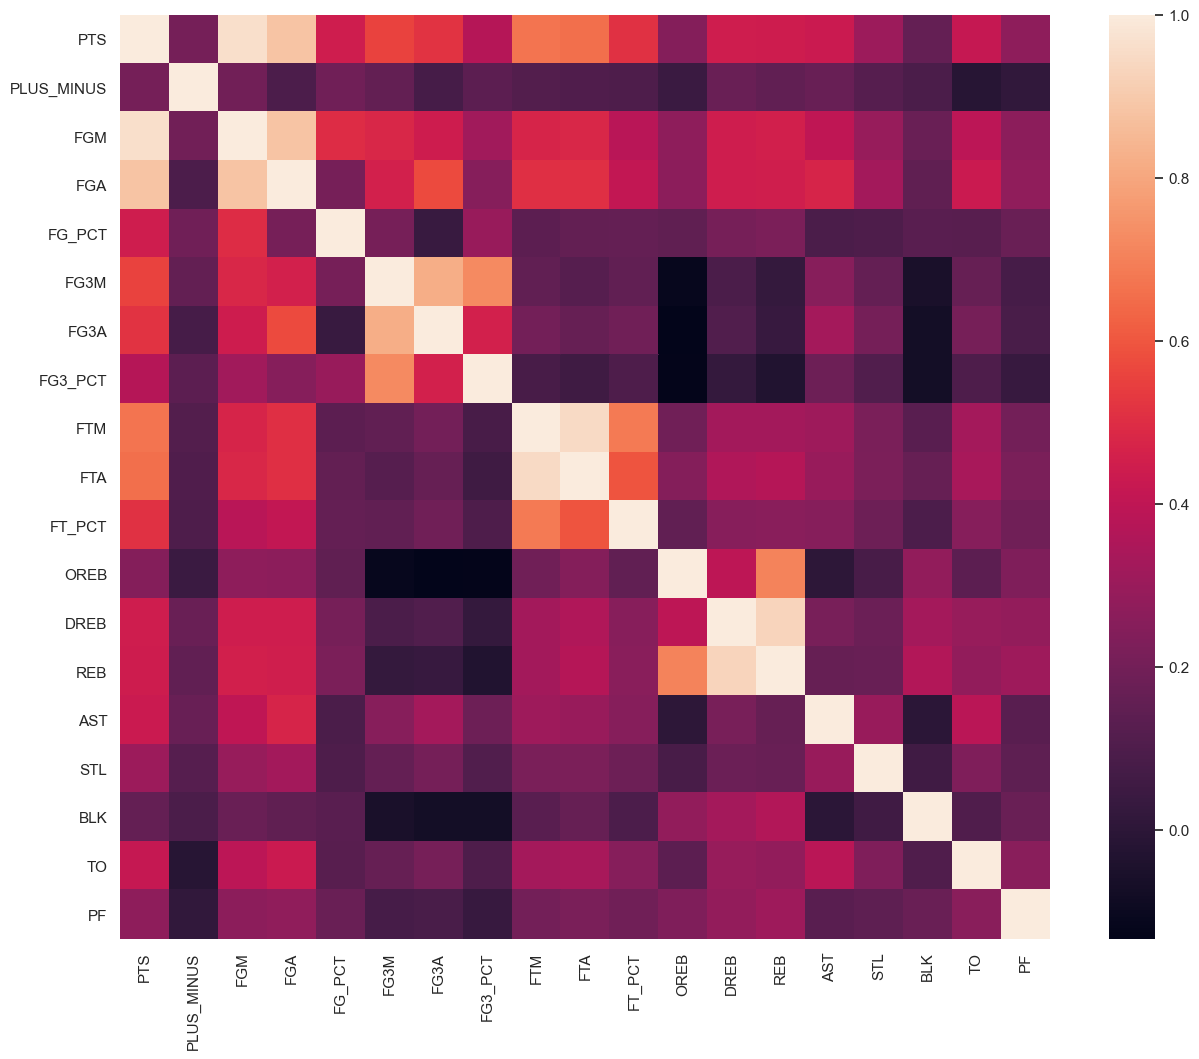

In [264]:
plt.figure(figsize = (15, 12))
sns.heatmap(corr_matrix)

In [265]:
win_matrix = teams.corr()
win_matrix.sort_values(by = 'WIN_PCT', ascending = False)

,WINS,LOSSES,WIN_PCT,PTS,OPP_PTS,PLUS_MINUS,FGM,FGA,FG_PCT,FG3M,...,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF
WIN_PCT,0.635728,-0.208031,1.000000,0.322645,0.037538,0.959723,0.317635,0.288188,0.354935,0.414761,...,0.278331,0.281332,0.236365,0.332172,0.308672,0.324897,0.299857,0.378350,0.269270,0.279683
PLUS_MINUS,0.529250,-0.317188,0.959723,0.171553,-0.126650,1.000000,0.167724,0.135040,0.208225,0.275095,...,0.123948,0.130247,0.075249,0.179116,0.153006,0.185518,0.155029,0.228013,0.114776,0.132171
WINS,1.000000,0.617055,0.635728,0.788051,0.635020,0.529250,0.785678,0.773134,0.802806,0.834044,...,0.741885,0.775888,0.724830,0.790239,0.776163,0.783609,0.768540,0.778793,0.747390,0.759604
FG3M,0.834044,0.639682,0.414761,0.953220,0.877414,0.275095,0.947683,0.943864,0.942077,1.000000,...,0.918781,0.927385,0.904295,0.949514,0.941191,0.940483,0.928873,0.920777,0.933653,0.932882
FG3_PCT,0.838874,0.674461,0.389075,0.986471,0.921577,0.239409,0.985829,0.982529,0.987648,0.967313,...,0.961402,0.977376,0.951937,0.986814,0.981284,0.978592,0.965347,0.965716,0.968925,0.969851
FG3A,0.817631,0.650428,0.386068,0.961451,0.896540,0.238893,0.955561,0.953824,0.948602,0.997577,...,0.934187,0.937616,0.919877,0.958478,0.951890,0.947102,0.940696,0.929827,0.945756,0.944235
BLK,0.778793,0.610597,0.378350,0.982999,0.921494,0.228013,0.983835,0.982190,0.985336,0.920777,...,0.976493,0.976931,0.971230,0.986254,0.985832,0.982543,0.979263,1.000000,0.978919,0.977106
FG_PCT,0.802806,0.659514,0.354935,0.995489,0.939994,0.208225,0.996269,0.994274,1.000000,0.942077,...,0.982838,0.992453,0.976318,0.995786,0.994253,0.993338,0.985033,0.985336,0.985329,0.987594
DREB,0.790239,0.669519,0.332172,0.997619,0.950853,0.179116,0.997390,0.997490,0.995786,0.949514,...,0.987675,0.990410,0.981781,1.000000,0.998803,0.992558,0.985791,0.986254,0.991812,0.990709
AST,0.783609,0.662985,0.324897,0.994908,0.946207,0.185518,0.995741,0.993480,0.993338,0.940483,...,0.983393,0.989174,0.976898,0.992558,0.991994,1.000000,0.988832,0.982543,0.989626,0.988479


<AxesSubplot:>

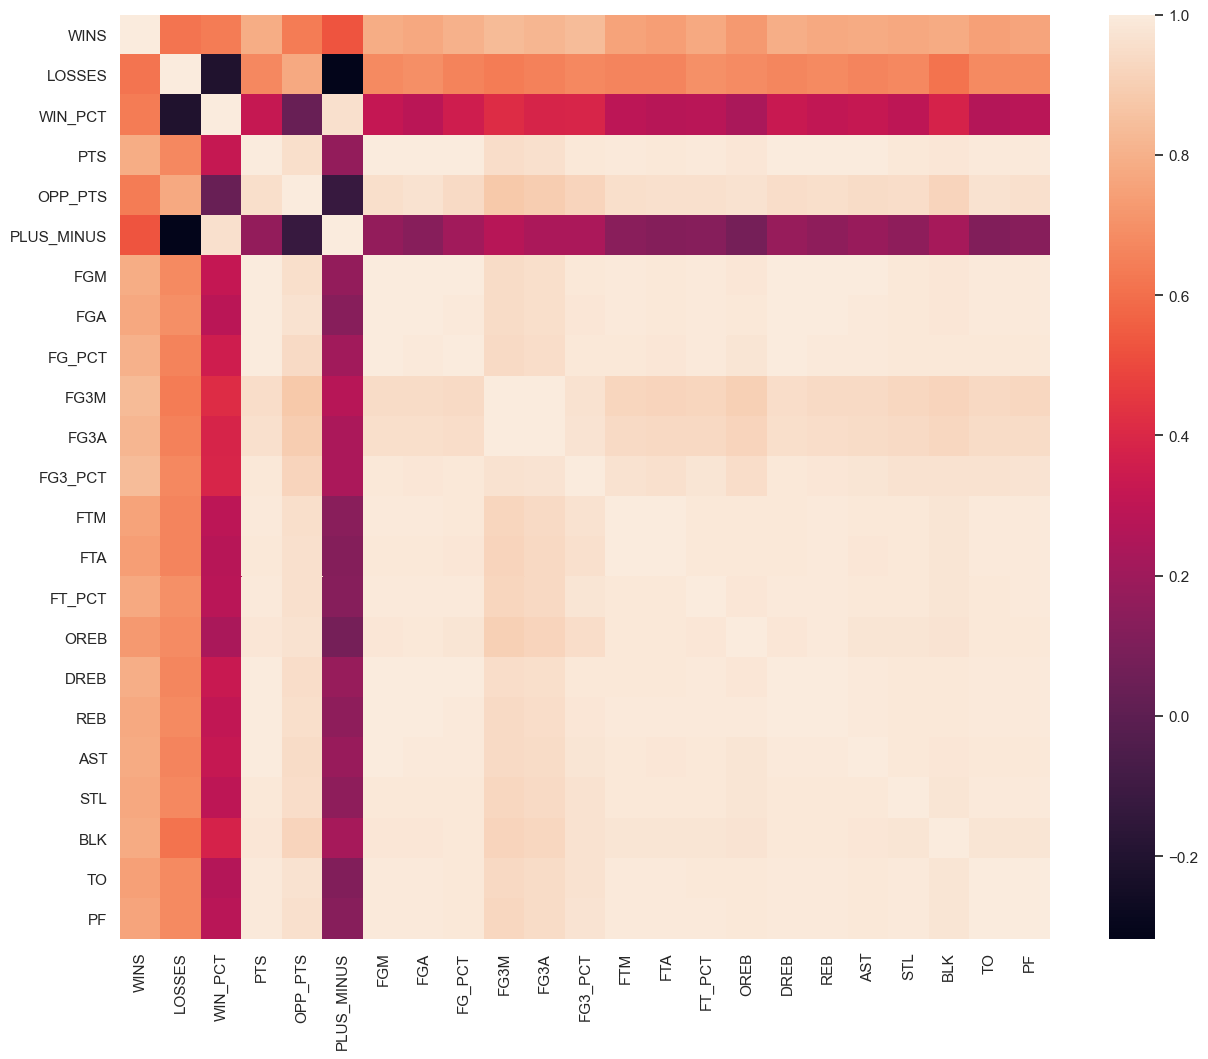

In [266]:
plt.figure(figsize = (15, 12))
sns.heatmap(win_matrix)

In [267]:
basket = NBA.groupby(['GAME_ID', 'PLAYER_NAME'])
basket = basket['MIN']
basket = basket.count()
basket = basket.unstack()
basket = basket.reset_index()
basket = basket.fillna(0)
basket = basket.set_index('GAME_ID')

basket

PLAYER_NAME,A.J. Guyton,A.J. Lawson,AJ Hammons,AJ Price,Aamir Simms,Aaron Brooks,Aaron Craft,Aaron Gordon,Aaron Gray,Aaron Harrison,...,Zeljko Rebraca,Zendon Hamilton,Zhaire Smith,Zhou Qi,Ziaire Williams,Zion Williamson,Zoran Dragic,Zoran Planinic,Zydrunas Ilgauskas,Zylan Cheatham
GAME_ID,,,,,,,,,,,,,,,,,,,,,
10300001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10300002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10300003,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10300004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10300005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52000111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52000121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52000131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [268]:
frequent_players = apriori(
    basket.astype(bool), 
    min_support = 0.03, 
    use_colnames = True
)

frequent_players.sort_values(by = 'support', ascending = False)

,support,itemsets
111,0.066308,(LeBron James)
8,0.057620,(Andre Iguodala)
107,0.056802,(Kyle Korver)
53,0.055867,(Dwight Howard)
25,0.055205,(Carmelo Anthony)
...,...,...
6,0.030154,(Anderson Varejao)
105,0.030115,(Kosta Koufos)
160,0.030115,(Roy Hibbert)
7,0.030076,(Andre Drummond)


In [269]:
sport_association = association_rules(
    frequent_players, 
    metric = 'confidence',
    min_threshold = 0.6
)

sport_association

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Udonis Haslem),(Dwyane Wade),0.041803,0.050608,0.033933,0.811743,16.039887,0.031818,5.043059
1,(Dwyane Wade),(Udonis Haslem),0.050608,0.041803,0.033933,0.670516,16.039887,0.031818,2.908173
2,(Tim Duncan),(Manu Ginobili),0.045582,0.048114,0.039037,0.856410,17.799464,0.036844,6.629203
3,(Manu Ginobili),(Tim Duncan),0.048114,0.045582,0.039037,0.811336,17.799464,0.036844,5.058825
4,(Tony Parker),(Manu Ginobili),0.052400,0.048114,0.042426,0.809665,16.827929,0.039905,5.001118
5,(Manu Ginobili),(Tony Parker),0.048114,0.052400,0.042426,0.881781,16.827929,0.039905,8.015659
6,(Marc Gasol),(Mike Conley),0.041024,0.042309,0.030076,0.733143,17.328108,0.028341,3.588783
7,(Mike Conley),(Marc Gasol),0.042309,0.041024,0.030076,0.710866,17.328108,0.028341,3.316714
8,(Tony Parker),(Tim Duncan),0.052400,0.045582,0.041530,0.792565,17.387658,0.039142,4.601047
9,(Tim Duncan),(Tony Parker),0.045582,0.052400,0.041530,0.911111,17.387658,0.039142,10.660501
